In [1]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [5]:
ccc_eed = pd.read_csv('CSV/board-exam-results - CCC-EED.csv')

In [6]:
ccc_eed['Year'] = ccc_eed['Time Date'].apply(lambda x: str(x)[-4:])
ccc_eed['Month'] = ccc_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
ccc_eed['Day'] = ccc_eed['Time Date'].apply(lambda x: str(x)[:-6])
ccc_eed['ds'] = pd.DatetimeIndex(ccc_eed['Year']+'-'+ccc_eed['Month']+'-'+ccc_eed['Day'])

In [7]:
ccc_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
ccc_eed.columns = ['y', 'ds']

In [8]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
ccc_eed_model = m.fit(ccc_eed)

16:05:10 - cmdstanpy - INFO - Chain [1] start processing
16:05:11 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
ccc_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
ccc_eed_forecast = m.predict(ccc_eed_future)
ccc_eed_forecast['yhat'] = ccc_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [10]:
ccc_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,71.0
1,2023-09-29,57.0
2,2024-03-24,63.0
3,2024-09-29,54.0
4,2025-03-24,62.0
5,2025-09-29,50.0
6,2026-03-24,60.0
7,2026-09-29,47.0
8,2027-03-24,59.0
9,2027-09-29,45.0


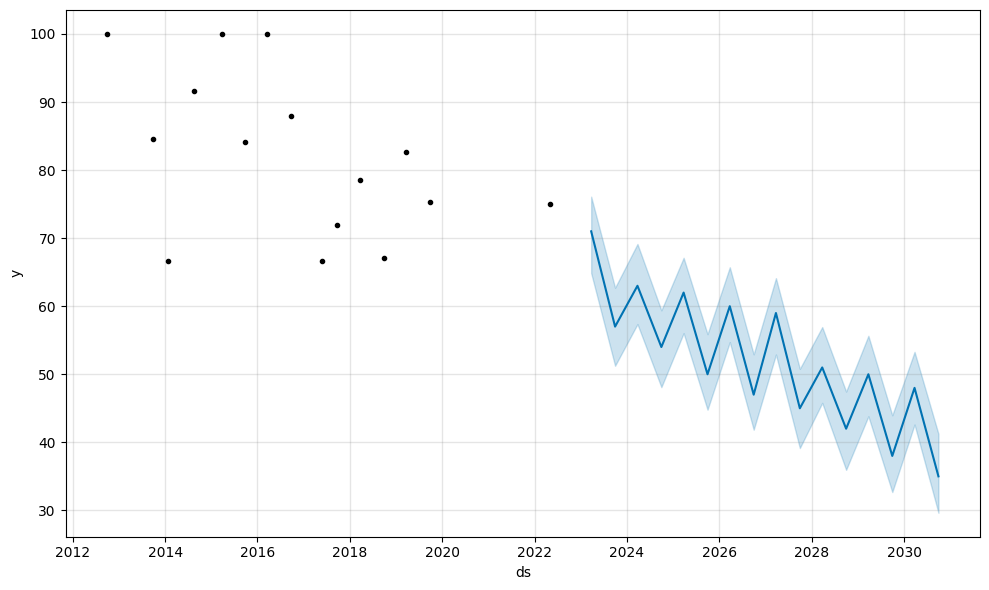

In [11]:
ccc_eed_plot = m.plot(ccc_eed_forecast)

In [18]:
cdc_eed = pd.read_csv('CSV/board-exam-results - CDC-EED.csv')

In [19]:
cdc_eed['Year'] = cdc_eed['Time Date'].apply(lambda x: str(x)[-4:])
cdc_eed['Month'] = cdc_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
cdc_eed['Day'] = cdc_eed['Time Date'].apply(lambda x: str(x)[:-6])
cdc_eed['ds'] = pd.DatetimeIndex(cdc_eed['Year']+'-'+cdc_eed['Month']+'-'+cdc_eed['Day'])

In [20]:
cdc_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
cdc_eed.columns = ['y', 'ds']

In [21]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
cdc_eed_model = m.fit(cdc_eed)

16:12:44 - cmdstanpy - INFO - Chain [1] start processing
16:12:44 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
cdc_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
cdc_eed_forecast = m.predict(cdc_eed_future)
cdc_eed_forecast['yhat'] = cdc_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [23]:
cdc_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,0.0
1,2023-09-29,0.0
2,2024-03-24,0.0
3,2024-09-29,0.0
4,2025-03-24,0.0
5,2025-09-29,0.0
6,2026-03-24,0.0
7,2026-09-29,0.0
8,2027-03-24,0.0
9,2027-09-29,0.0


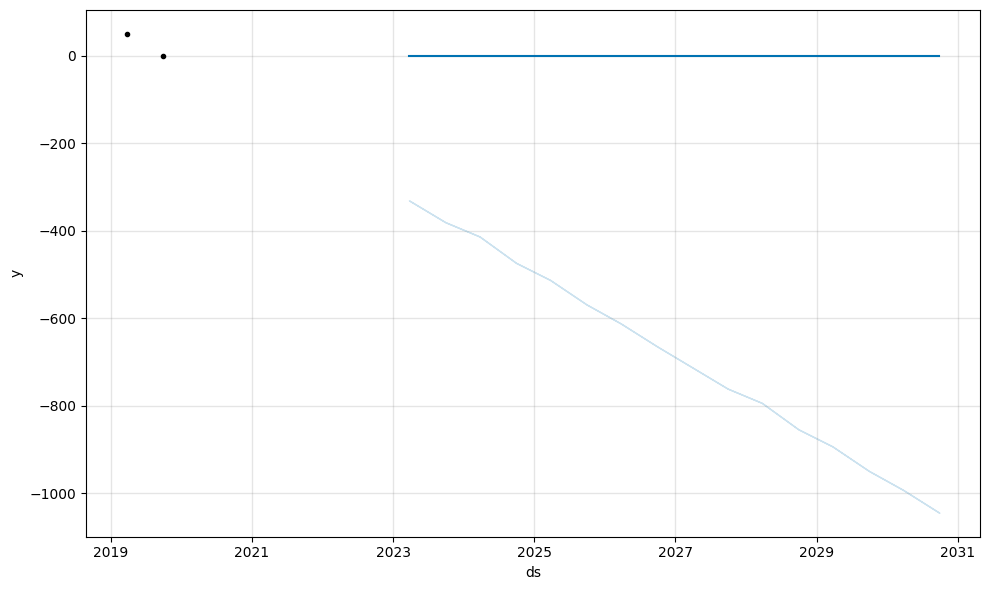

In [24]:
cdc_eed_plot = m.plot(cdc_eed_forecast)

In [25]:
letran_eed = pd.read_csv('CSV/board-exam-results - LETRAN-EED.csv')

In [26]:
letran_eed['Year'] = letran_eed['Time Date'].apply(lambda x: str(x)[-4:])
letran_eed['Month'] = letran_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
letran_eed['Day'] = letran_eed['Time Date'].apply(lambda x: str(x)[:-6])
letran_eed['ds'] = pd.DatetimeIndex(letran_eed['Year']+'-'+letran_eed['Month']+'-'+letran_eed['Day'])

In [27]:
letran_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
letran_eed.columns = ['y', 'ds']

In [28]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
letran_eed_model = m.fit(letran_eed)

16:17:17 - cmdstanpy - INFO - Chain [1] start processing
16:17:17 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
letran_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
letran_eed_forecast = m.predict(letran_eed_future)
letran_eed_forecast['yhat'] = letran_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [30]:
letran_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,13.0
1,2023-09-29,83.0
2,2024-03-24,24.0
3,2024-09-29,88.0
4,2025-03-24,26.0
5,2025-09-29,92.0
6,2026-03-24,28.0
7,2026-09-29,96.0
8,2027-03-24,30.0
9,2027-09-29,100.0


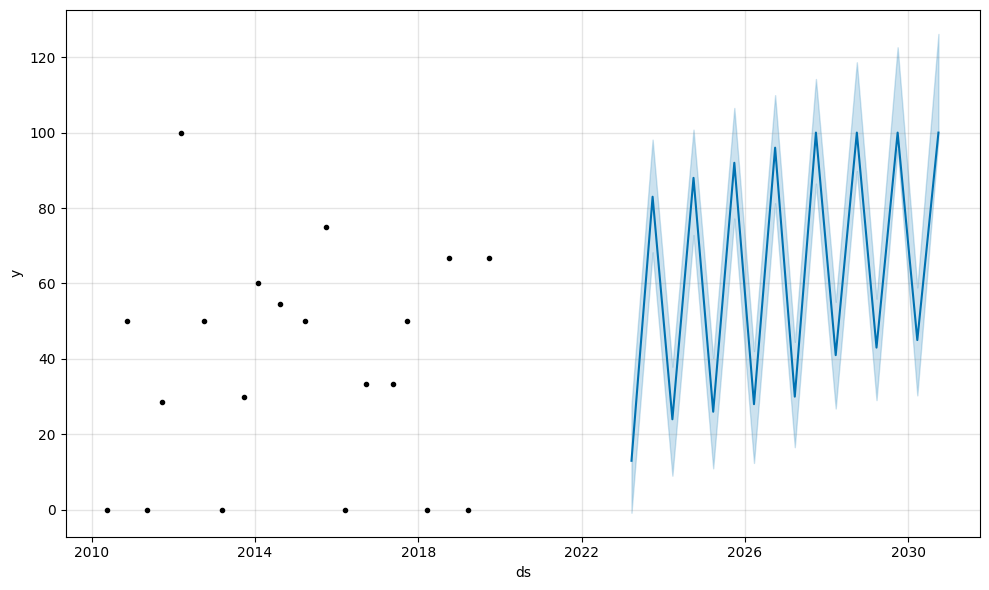

In [31]:
letran_eed_plot = m.plot(letran_eed_forecast)

In [32]:
lcba_eed = pd.read_csv('CSV/board-exam-results - LCBA - EED.csv')

In [33]:
lcba_eed['Year'] = lcba_eed['Time Date'].apply(lambda x: str(x)[-4:])
lcba_eed['Month'] = lcba_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
lcba_eed['Day'] = lcba_eed['Time Date'].apply(lambda x: str(x)[:-6])
lcba_eed['ds'] = pd.DatetimeIndex(lcba_eed['Year']+'-'+lcba_eed['Month']+'-'+lcba_eed['Day'])

In [34]:
lcba_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
lcba_eed.columns = ['y', 'ds']

In [35]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
lcba_eed_model = m.fit(lcba_eed)

16:40:19 - cmdstanpy - INFO - Chain [1] start processing
16:40:19 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
lcba_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
lcba_eed_forecast = m.predict(lcba_eed_future)
lcba_eed_forecast['yhat'] = lcba_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [37]:
lcba_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,20.0
1,2023-09-29,23.0
2,2024-03-24,20.0
3,2024-09-29,28.0
4,2025-03-24,20.0
5,2025-09-29,26.0
6,2026-03-24,21.0
7,2026-09-29,25.0
8,2027-03-24,21.0
9,2027-09-29,24.0


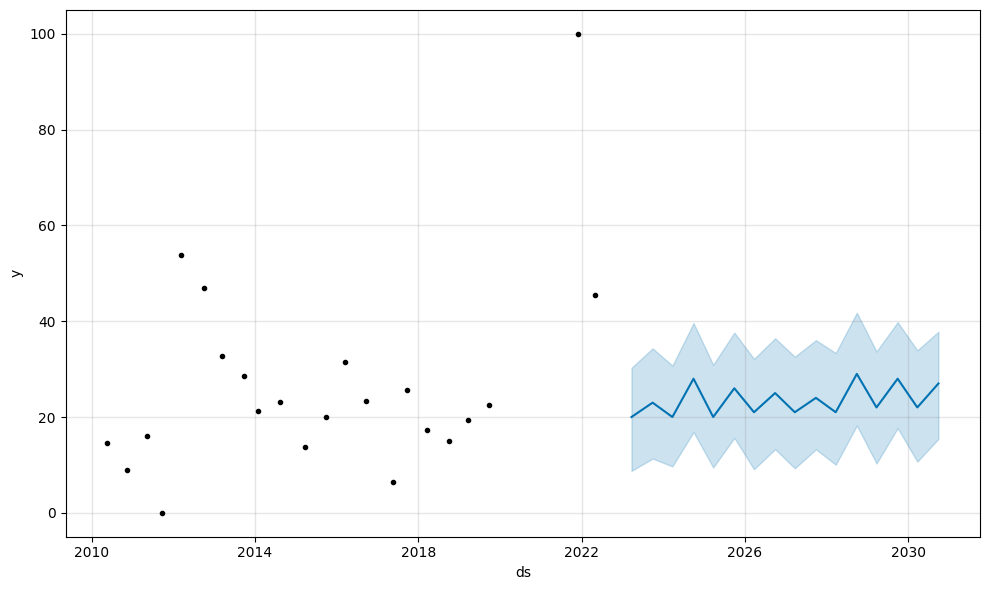

In [38]:
lcba_eed_plot = m.plot(lcba_eed_forecast)

In [39]:
sjc_eed = pd.read_csv('CSV/board-exam-results - SJC - EED.csv')

In [40]:
sjc_eed['Year'] = sjc_eed['Time Date'].apply(lambda x: str(x)[-4:])
sjc_eed['Month'] = sjc_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
sjc_eed['Day'] = sjc_eed['Time Date'].apply(lambda x: str(x)[:-6])
sjc_eed['ds'] = pd.DatetimeIndex(sjc_eed['Year']+'-'+sjc_eed['Month']+'-'+sjc_eed['Day'])

In [41]:
sjc_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
sjc_eed.columns = ['y', 'ds']

In [42]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
sjc_eed_model = m.fit(sjc_eed)

16:47:53 - cmdstanpy - INFO - Chain [1] start processing
16:47:53 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
sjc_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
sjc_eed_forecast = m.predict(sjc_eed_future)
sjc_eed_forecast['yhat'] = sjc_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [44]:
sjc_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,13.0
1,2023-09-29,19.0
2,2024-03-24,19.0
3,2024-09-29,26.0
4,2025-03-24,17.0
5,2025-09-29,22.0
6,2026-03-24,14.0
7,2026-09-29,19.0
8,2027-03-24,12.0
9,2027-09-29,17.0


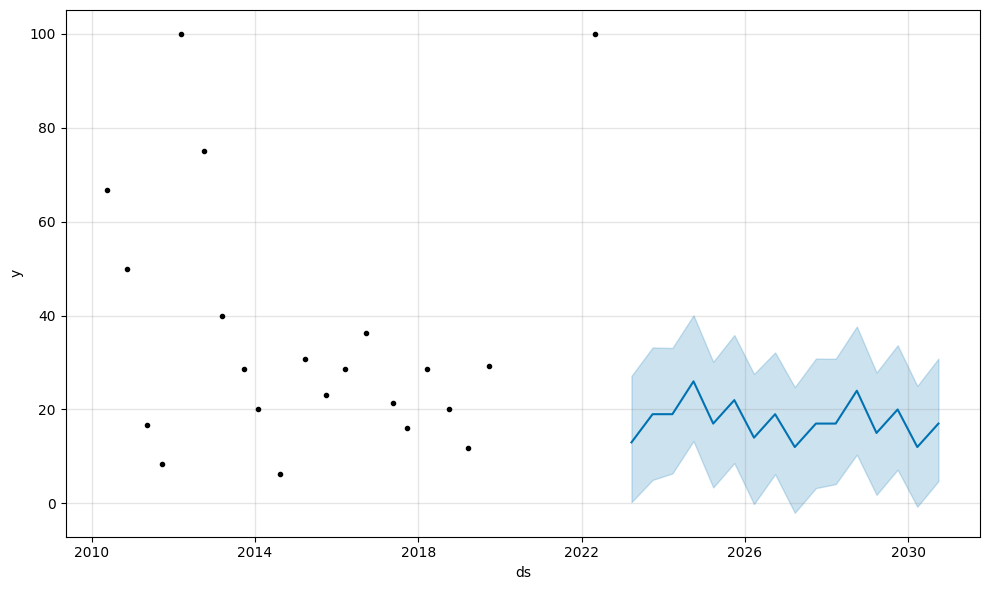

In [45]:
sjc_eed_plot = m.plot(sjc_eed_forecast)

In [46]:
perps_eed = pd.read_csv('CSV/board-exam-results - PERPS - EED.csv')

In [47]:
perps_eed['Year'] = perps_eed['Time Date'].apply(lambda x: str(x)[-4:])
perps_eed['Month'] = perps_eed['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_eed['Day'] = perps_eed['Time Date'].apply(lambda x: str(x)[:-6])
perps_eed['ds'] = pd.DatetimeIndex(perps_eed['Year']+'-'+perps_eed['Month']+'-'+perps_eed['Day'])

In [48]:
perps_eed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_eed.columns = ['y', 'ds']

In [49]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_eed_model = m.fit(perps_eed)

16:53:35 - cmdstanpy - INFO - Chain [1] start processing
16:53:36 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
perps_eed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_eed_forecast = m.predict(perps_eed_future)
perps_eed_forecast['yhat'] = perps_eed_forecast['yhat'].clip(lower=0, upper=100).round()

In [51]:
perps_eed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,51.0
1,2023-09-29,77.0
2,2024-03-24,46.0
3,2024-09-29,96.0
4,2025-03-24,56.0
5,2025-09-29,97.0
6,2026-03-24,66.0
7,2026-09-29,100.0
8,2027-03-24,76.0
9,2027-09-29,100.0


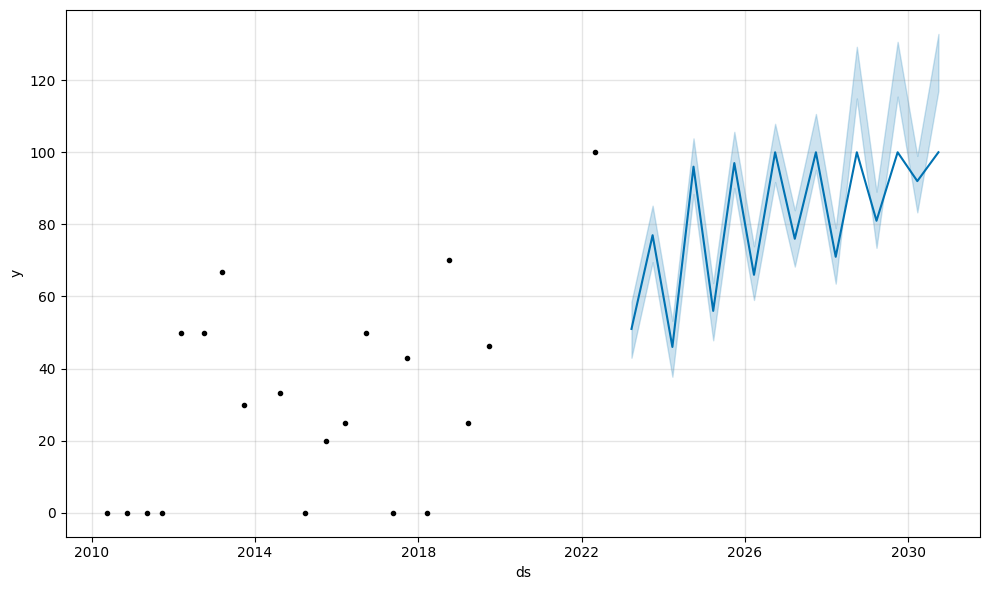

In [52]:
perps_eed_plot = m.plot(perps_eed_forecast)